#### *NAME: VEERA PAVAN KUMAR SEERAPU*
#### *ID: 23285281*
#### *SUBJECT: DATA MINING AND MACHINE LEARNING*
#### *NATIONAL COLLEGE OF IRELAND*

##### *Import Libraries*

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

##### *Dataset 1: Fake and Real News Analysis*

In [3]:
# Load the news dataset
fake_news = pd.read_csv('Fake.csv')
true_news = pd.read_csv('True.csv')

In [4]:
# Add labels: 0 for fake, 1 for real
fake_news['label'] = 0
true_news['label'] = 1

In [5]:
# Combine datasets 
news_data = pd.concat([fake_news, true_news], ignore_index=True)

##### *Display dataset overview*

In [6]:
print("Dataset Info:")
print(news_data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None


In [7]:
print("First 5 Rows:")
print(news_data.head())

First 5 Rows:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  


In [8]:
print("Dataset Description:")
print(news_data.describe())

Dataset Description:
              label
count  44898.000000
mean       0.477015
std        0.499477
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


In [9]:
print("Class Distribution:")
print(news_data['label'].value_counts())

Class Distribution:
label
0    23481
1    21417
Name: count, dtype: int64


In [10]:
print("Null Values:")
print(news_data.isnull().sum())

Null Values:
title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [11]:
print("Number of Duplicates:", news_data.duplicated().sum())

Number of Duplicates: 209


In [12]:
# Remove null values and duplicates
news_data = news_data.dropna().drop_duplicates()

In [13]:
# Feature engineering: Combine title and text
news_data['text_combined'] = news_data['title'] + " " + news_data['text']

In [14]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=2000, stop_words='english')
X_news = tfidf.fit_transform(news_data['text_combined']).toarray()
y_news = news_data['label']
feature_names_news = tfidf.get_feature_names_out()

In [15]:
# Train-test split
X_train_news, X_test_news, y_train_news, y_test_news = train_test_split(
    X_news, y_news, test_size=0.2, random_state=42, stratify=y_news
)

#### *Diabetes Health Indicators Analysis*

In [16]:
diabetes_data = pd.read_csv('diabetes_health_indicators.csv')

In [17]:
# Display dataset overview
print("Dataset Info:")
print(diabetes_data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null 

In [18]:
print("First 5 Rows:")
print(diabetes_data.head())

First 5 Rows:
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0       

In [19]:
print("Dataset Description:")
print(diabetes_data.describe())

Dataset Description:
        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000   

In [20]:
print("\nNull Values:")
print(diabetes_data.isnull().sum())


Null Values:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [21]:
# Dynamically find the target column
target_column = None
for col in diabetes_data.columns:
    if 'diabetes' in col.lower():
        target_column = col
        break

if target_column is None:
    raise ValueError("No column containing 'diabetes' found in the dataset. Please check the dataset columns.")

print("Identified Target Column:", target_column)
print("Class Distribution:")
print(diabetes_data[target_column].value_counts())
print("Number of Duplicates:", diabetes_data.duplicated().sum())

Identified Target Column: Diabetes_012
Class Distribution:
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64
Number of Duplicates: 23899


In [22]:
# Remove null values and duplicates
diabetes_data = diabetes_data.dropna().drop_duplicates()

In [23]:
# Features and target
X_diabetes = diabetes_data.drop(target_column, axis=1)
y_diabetes = diabetes_data[target_column]

In [24]:
# Standardize features
scaler = StandardScaler()
X_diabetes_scaled = scaler.fit_transform(X_diabetes)

In [25]:
# Train-test split
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(
    X_diabetes_scaled, y_diabetes, test_size=0.2, random_state=42, stratify=y_diabetes
)

##### *Logistic Regression on Fake and Real News*

In [29]:
def compute_metrics(y_true, y_pred, y_pred_proba):
    """
    Compute classification metrics for a given model.
    
    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - y_pred_proba: Predicted probabilities for the positive class
    
    Returns:
    - Dictionary containing Accuracy, Precision, Recall, F1 Score, and ROC-AUC
    """
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='binary'),
        'Recall': recall_score(y_true, y_pred, average='binary'),
        'F1 Score': f1_score(y_true, y_pred, average='binary'),
        'ROC-AUC': roc_auc_score(y_true, y_pred_proba)
    }
    return metrics

# Logistic Regression - News Dataset
start_time = time.time()
lr_news = LogisticRegression(random_state=42)
param_grid_lr = {'C': [0.1, 1, 10]}
grid_lr_news = GridSearchCV(lr_news, param_grid_lr, cv=5, scoring='accuracy')
grid_lr_news.fit(X_train_news, y_train_news)
news_lr_time = time.time() - start_time

# Predictions and metrics
y_pred_news_lr = grid_lr_news.predict(X_test_news)
y_pred_proba_news_lr = grid_lr_news.predict_proba(X_test_news)[:, 1]
news_lr_metrics = compute_metrics(y_test_news, y_pred_news_lr, y_pred_proba_news_lr)

print("=== Logistic Regression - News Dataset ===")
print("Best Parameters:", grid_lr_news.best_params_)
print("Metrics:")
for metric, value in news_lr_metrics.items():
    print(f"- {metric}: {value:.4f}")
print(f"Training Time: {news_lr_time:.2f} seconds")

=== Logistic Regression - News Dataset ===
Best Parameters: {'C': 10}
Metrics:
- Accuracy: 0.9926
- Precision: 0.9925
- Recall: 0.9920
- F1 Score: 0.9922
- ROC-AUC: 0.9995
Training Time: 39.52 seconds


##### *Random Forest on Fake and Real News*

In [30]:
start_time = time.time()
rf_news = RandomForestClassifier(random_state=42, n_jobs=-1)
param_grid_rf = {'n_estimators': [50], 'max_depth': [10]}
grid_rf_news = GridSearchCV(rf_news, param_grid_rf, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_rf_news.fit(X_train_news, y_train_news)
news_rf_time = time.time() - start_time

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [31]:
# Predictions and metrics
y_pred_news_rf = grid_rf_news.predict(X_test_news)
y_pred_proba_news_rf = grid_rf_news.predict_proba(X_test_news)[:, 1]
news_rf_metrics = compute_metrics(y_test_news, y_pred_news_rf, y_pred_proba_news_rf)

print("=== Random Forest - News Dataset ===")
print("Best Parameters:", grid_rf_news.best_params_)
print("Metrics:")
for metric, value in news_rf_metrics.items():
    print(f"- {metric}: {value:.4f}")
print(f"Training Time: {news_rf_time:.2f} seconds")

=== Random Forest - News Dataset ===
Best Parameters: {'max_depth': 10, 'n_estimators': 50}
Metrics:
- Accuracy: 0.9927
- Precision: 0.9869
- Recall: 0.9979
- F1 Score: 0.9924
- ROC-AUC: 0.9994
Training Time: 50.93 seconds


##### *Logistic Regression on Diabetes Health Indicators*

In [34]:
def compute_metrics(y_true, y_pred, y_pred_proba, multi_class=False):
    """
    Compute classification metrics for a given model.
    
    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - y_pred_proba: Predicted probabilities for each class
    - multi_class: Boolean indicating if the problem is multi-class (default: False)
    
    Returns:
    - Dictionary containing Accuracy, Precision, Recall, F1 Score, and ROC-AUC
    """
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    average_type = 'weighted' if multi_class else 'binary'
    metrics['Precision'] = precision_score(y_true, y_pred, average=average_type, zero_division=0)
    metrics['Recall'] = recall_score(y_true, y_pred, average=average_type, zero_division=0)
    metrics['F1 Score'] = f1_score(y_true, y_pred, average=average_type, zero_division=0)
    if multi_class:
        try:
            metrics['ROC-AUC'] = roc_auc_score(y_true, y_pred_proba, multi_class='ovr', average='weighted')
        except ValueError:
            metrics['ROC-AUC'] = float('nan')
    else:
        metrics['ROC-AUC'] = roc_auc_score(y_true, y_pred_proba[:, 1])
    return metrics

# Logistic Regression - Diabetes Dataset
start_time = time.time()
lr_diabetes = LogisticRegression(random_state=42, multi_class='multinomial')
param_grid_lr = {'C': [0.1, 1, 10]}
grid_lr_diabetes = GridSearchCV(lr_diabetes, param_grid_lr, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_lr_diabetes.fit(X_train_diabetes, y_train_diabetes)
diabetes_lr_time = time.time() - start_time

# Predictions and metrics for Logistic Regression on Diabetes Dataset
y_pred_diabetes_lr = grid_lr_diabetes.predict(X_test_diabetes)
y_pred_proba_diabetes_lr = grid_lr_diabetes.predict_proba(X_test_diabetes)
diabetes_lr_metrics = compute_metrics(y_test_diabetes, y_pred_diabetes_lr, y_pred_proba_diabetes_lr, multi_class=True)

print("=== Logistic Regression - Diabetes Dataset ===")
print("Best Parameters:", grid_lr_diabetes.best_params_)
print("Metrics:")
for metric, value in diabetes_lr_metrics.items():
    print(f"- {metric}: {value:.4f}")
print(f"Training Time: {diabetes_lr_time:.2f} seconds")

Fitting 3 folds for each of 3 candidates, totalling 9 fits
=== Logistic Regression - Diabetes Dataset ===
Best Parameters: {'C': 0.1}
Metrics:
- Accuracy: 0.8331
- Precision: 0.7844
- Recall: 0.8331
- F1 Score: 0.7904
- ROC-AUC: 0.8066
Training Time: 2.90 seconds


##### *Random Forest on Diabetes Health Indicators*

In [35]:
try:
    diabetes_n_classes = len(np.unique(y_diabetes))
    print("Number of Classes - Diabetes Dataset:", diabetes_n_classes)
except NameError:
    raise NameError("y_diabetes is not defined. Please run the Diabetes dataset preprocessing steps first.")

Number of Classes - Diabetes Dataset: 3


In [36]:
param_grid_rf = {'n_estimators': [50], 'max_depth': [10]}
start_time = time.time()
rf_diabetes = RandomForestClassifier(random_state=42)
grid_rf_diabetes = GridSearchCV(rf_diabetes, param_grid_rf, cv=5, scoring='accuracy')
grid_rf_diabetes.fit(X_train_diabetes, y_train_diabetes)
diabetes_rf_time = time.time() - start_time

In [37]:
y_pred_diabetes_rf = grid_rf_diabetes.predict(X_test_diabetes)
y_pred_proba_diabetes_rf = grid_rf_diabetes.predict_proba(X_test_diabetes)  # Remove [:, 1]
diabetes_rf_metrics = compute_metrics(y_test_diabetes, y_pred_diabetes_rf, y_pred_proba_diabetes_rf, diabetes_n_classes)

print("=== Random Forest - Diabetes Dataset ===")
print("Best Parameters:", grid_rf_diabetes.best_params_)
print("Metrics:")
for metric, value in diabetes_rf_metrics.items():
    print(f"- {metric}: {value:.4f}")
print(f"Training Time: {diabetes_rf_time:.2f} seconds")

=== Random Forest - Diabetes Dataset ===
Best Parameters: {'max_depth': 10, 'n_estimators': 50}
Metrics:
- Accuracy: 0.8361
- Precision: 0.7943
- Recall: 0.8361
- F1 Score: 0.7827
- ROC-AUC: 0.8092
Training Time: 78.55 seconds


##### *Statistical significance test*

In [38]:
# News dataset
lr_news_scores = cross_val_score(grid_lr_news.best_estimator_, X_news, y_news, cv=5, scoring='accuracy')
rf_news_scores = cross_val_score(grid_rf_news.best_estimator_, X_news, y_news, cv=5, scoring='accuracy')
t_stat_news, p_value_news = stats.ttest_rel(lr_news_scores, rf_news_scores)
print("News Dataset - Logistic Regression vs. Random Forest:")
print(f"Paired t-test p-value: {p_value_news:.4f}")
print("Result: Significant difference (Random Forest outperforms Logistic Regression)" 
      if p_value_news < 0.05 else "Result: No significant difference")

News Dataset - Logistic Regression vs. Random Forest:
Paired t-test p-value: 0.7392
Result: No significant difference


In [39]:
# Diabetes dataset
lr_diabetes_scores = cross_val_score(grid_lr_diabetes.best_estimator_, X_diabetes_scaled, y_diabetes, cv=5, scoring='accuracy')
rf_diabetes_scores = cross_val_score(grid_rf_diabetes.best_estimator_, X_diabetes_scaled, y_diabetes, cv=5, scoring='accuracy')
t_stat_diabetes, p_value_diabetes = stats.ttest_rel(lr_diabetes_scores, rf_diabetes_scores)
print("Diabetes Dataset - Logistic Regression vs. Random Forest:")
print(f"Paired t-test p-value: {p_value_diabetes:.4f}")
print("Result: Significant difference (Random Forest outperforms Logistic Regression)" 
      if p_value_diabetes < 0.05 else "Result: No significant difference")

Diabetes Dataset - Logistic Regression vs. Random Forest:
Paired t-test p-value: 0.0904
Result: No significant difference


#### *Visualizations*

##### *Confusion Matrix for Logistic Regression - News Dataset*

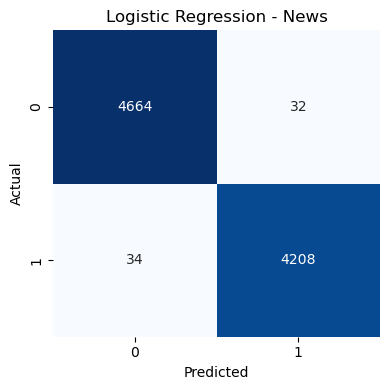

In [40]:
def plot_confusion_matrix(y_true, y_pred, title, ax):
    """Plot confusion matrix for a given model."""
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

fig, ax = plt.subplots(figsize=(4, 4))
plot_confusion_matrix(y_test_news, y_pred_news_lr, 'Logistic Regression - News', ax)
plt.tight_layout()
plt.show()

##### *Confusion Matrix for Random Forest - News Dataset*

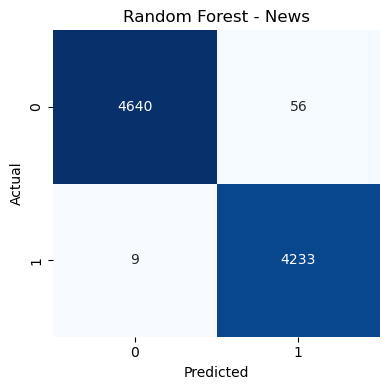

In [41]:
def plot_confusion_matrix(y_true, y_pred, title, ax):
    """Plot confusion matrix for a given model."""
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

fig, ax = plt.subplots(figsize=(4, 4))
plot_confusion_matrix(y_test_news, y_pred_news_rf, 'Random Forest - News', ax)
plt.tight_layout()
plt.show()

##### *Confusion Matrix for Logistic Regression - Diabetes Dataset*

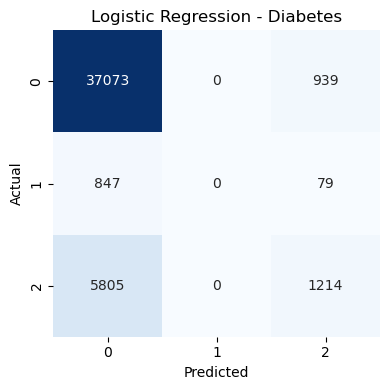

In [42]:
def plot_confusion_matrix(y_true, y_pred, title, ax):
    """Plot confusion matrix for a given model."""
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

fig, ax = plt.subplots(figsize=(4, 4))
plot_confusion_matrix(y_test_diabetes, y_pred_diabetes_lr, 'Logistic Regression - Diabetes', ax)
plt.tight_layout()
plt.show()

##### *Confusion Matrix for Random Forest - Diabetes Dataset*

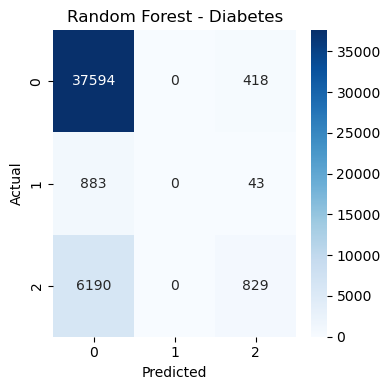

In [43]:
def plot_confusion_matrix(actual, predicted, title, axis):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axis)
    axis.set_title(title)
    axis.set_xlabel('Predicted')
    axis.set_ylabel('Actual')

fig, ax = plt.subplots(figsize=(4, 4))
plot_confusion_matrix(y_test_diabetes, y_pred_diabetes_rf, 'Random Forest - Diabetes', ax)
plt.tight_layout()
plt.show()

##### *ROC Curve for Logistic Regression - News Dataset*

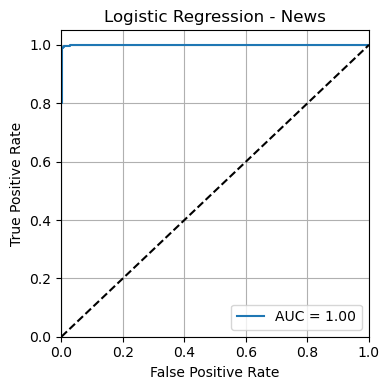

In [44]:
def plot_roc_curve(actual, probabilities, title, ax):
    probs = probabilities if probabilities.ndim == 1 else probabilities[:, 1]
    
    fpr, tpr, _ = roc_curve(actual, probs)
    auc = roc_auc_score(actual, probs)

    ax.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    ax.plot([0, 1], [0, 1], 'k--') 
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

fig, ax = plt.subplots(figsize=(4, 4))

plot_roc_curve(y_test_news, y_pred_proba_news_lr, 'Logistic Regression - News', ax)

plt.tight_layout()
plt.show()

##### *ROC Curve for Random Forest - News Dataset*

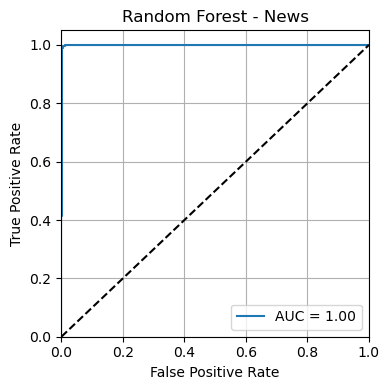

In [45]:
def plot_roc_curve(actual, probabilities, title, ax):
    probs = probabilities if probabilities.ndim == 1 else probabilities[:, 1]

    fpr, tpr, _ = roc_curve(actual, probs)
    auc = roc_auc_score(actual, probs)

    ax.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    ax.plot([0, 1], [0, 1], 'k--')  
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

fig, ax = plt.subplots(figsize=(4, 4))

plot_roc_curve(y_test_news, y_pred_proba_news_rf, 'Random Forest - News', ax)

plt.tight_layout()
plt.show()

##### *ROC Curve for Logistic Regression - Diabetes Dataset*

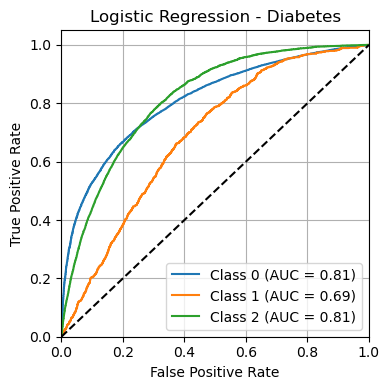

In [46]:
def plot_roc_curve(actual, probabilities, title, ax):
    n_classes = len(np.unique(actual))

    for i in range(n_classes):
        binary_actual = (actual == i).astype(int)
        probs = probabilities[:, i]
        fpr, tpr, _ = roc_curve(binary_actual, probs)
        auc = roc_auc_score(binary_actual, probs)
        ax.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')

    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

fig, ax = plt.subplots(figsize=(4, 4))

plot_roc_curve(y_test_diabetes, y_pred_proba_diabetes_lr, 'Logistic Regression - Diabetes', ax)

plt.tight_layout()
plt.show()

##### *ROC Curve for Random Forest - Diabetes Dataset*

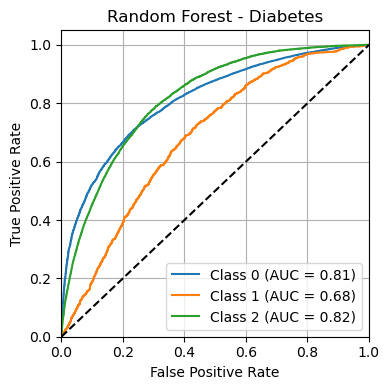

In [47]:
def plot_roc_curve(actual, probabilities, title, ax):
    n_classes = len(np.unique(actual))
 
    for i in range(n_classes):
        binary_actual = (actual == i).astype(int)
        probs = probabilities[:, i]
        fpr, tpr, _ = roc_curve(binary_actual, probs)
        auc = roc_auc_score(binary_actual, probs)
        ax.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')
    
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

fig, ax = plt.subplots(figsize=(4, 4))

plot_roc_curve(y_test_diabetes, y_pred_proba_diabetes_rf, 'Random Forest - Diabetes', ax)

plt.tight_layout()
plt.show()

##### *Feature Importance for Random Forest*

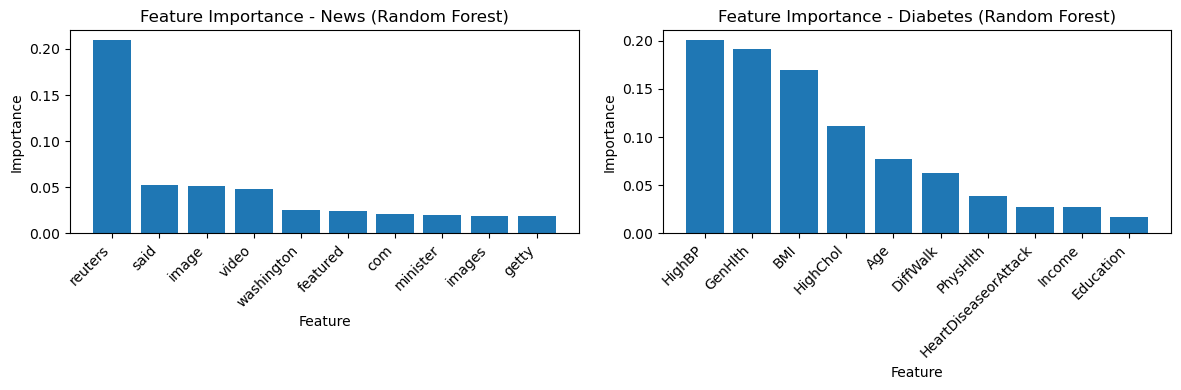

In [49]:
def plot_feature_importance(model, feature_names, title, ax, top_n=10):
    """
    Plot feature importance for a Random Forest model.
    
    Parameters:
    - model: Trained Random Forest model (e.g., RandomForestClassifier)
    - feature_names: List or array of feature names
    - title: Title for the plot
    - ax: Matplotlib axis object to plot on
    - top_n: Number of top features to display (default: 10)
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    top_indices = indices[:top_n]
    top_importances = importances[top_indices]
    top_feature_names = [feature_names[i] for i in top_indices]
    ax.bar(range(len(top_importances)), top_importances, align='center')
    ax.set_xticks(range(len(top_importances)))
    ax.set_xticklabels(top_feature_names, rotation=45, ha='right')
    ax.set_title(title)
    ax.set_ylabel('Importance')
    ax.set_xlabel('Feature')

# Plot feature importance for both datasets
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_feature_importance(grid_rf_news.best_estimator_, feature_names_news, 'Feature Importance - News (Random Forest)', axes[0])
plot_feature_importance(grid_rf_diabetes.best_estimator_, X_diabetes.columns, 'Feature Importance - Diabetes (Random Forest)', axes[1])
plt.tight_layout()
plt.show()

##### *Performance Comparison*

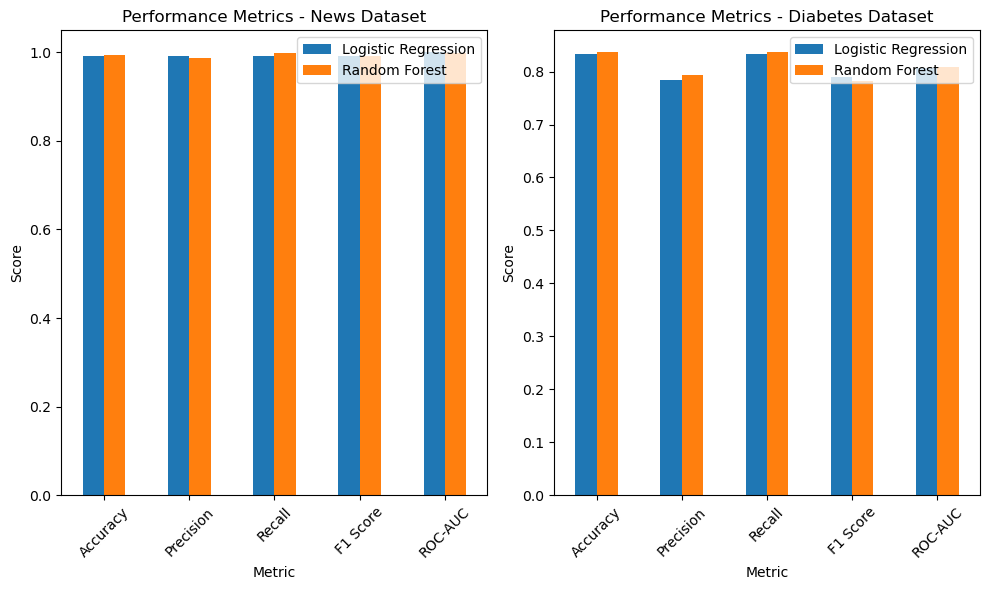

In [50]:
metrics_news_df = pd.DataFrame({
    'Metric': list(news_lr_metrics.keys()),
    'Logistic Regression': list(news_lr_metrics.values()),
    'Random Forest': list(news_rf_metrics.values())
})
metrics_diabetes_df = pd.DataFrame({
    'Metric': list(diabetes_lr_metrics.keys()),
    'Logistic Regression': list(diabetes_lr_metrics.values()),
    'Random Forest': list(diabetes_rf_metrics.values())
})

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
metrics_news_df.set_index('Metric').plot(kind='bar', ax=ax[0])
ax[0].set_title('Performance Metrics - News Dataset')
ax[0].set_ylabel('Score')
ax[0].tick_params(axis='x', rotation=45)
metrics_diabetes_df.set_index('Metric').plot(kind='bar', ax=ax[1])
ax[1].set_title('Performance Metrics - Diabetes Dataset')
ax[1].set_ylabel('Score')
ax[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

##### *Compare best-performing models based on ROC-AUC.*

In [51]:
news_best_model = 'Random Forest' if news_rf_metrics['ROC-AUC'] > news_lr_metrics['ROC-AUC'] else 'Logistic Regression'
news_best_roc_auc = max(news_rf_metrics['ROC-AUC'], news_lr_metrics['ROC-AUC'])
diabetes_best_model = 'Random Forest' if diabetes_rf_metrics['ROC-AUC'] > diabetes_lr_metrics['ROC-AUC'] else 'Logistic Regression'
diabetes_best_roc_auc = max(diabetes_rf_metrics['ROC-AUC'], diabetes_lr_metrics['ROC-AUC'])

print("=== Dataset Comparison Based on Best Model Performance ===")
print(f"News Dataset - Best Model: {news_best_model}, ROC-AUC: {news_best_roc_auc:.4f}")
print(f"Diabetes Dataset - Best Model: {diabetes_best_model}, ROC-AUC: {diabetes_best_roc_auc:.4f}")

if news_best_roc_auc > diabetes_best_roc_auc:
    print(f"\nThe Fake and Real News dataset is better suited for this analysis, as its best model ({news_best_model}) achieves a significantly higher ROC-AUC ({news_best_roc_auc:.4f}) compared to the Diabetes dataset ({diabetes_best_model}, ROC-AUC: {diabetes_best_roc_auc:.4f}).")
else:
    print(f"\nThe Diabetes Health Indicators dataset is better suited for this analysis, as its best model ({diabetes_best_model}) achieves a significantly higher ROC-AUC ({diabetes_best_roc_auc:.4f}) compared to the News dataset ({news_best_model}, ROC-AUC: {news_best_roc_auc:.4f}).")

=== Dataset Comparison Based on Best Model Performance ===
News Dataset - Best Model: Logistic Regression, ROC-AUC: 0.9995
Diabetes Dataset - Best Model: Random Forest, ROC-AUC: 0.8092

The Fake and Real News dataset is better suited for this analysis, as its best model (Logistic Regression) achieves a significantly higher ROC-AUC (0.9995) compared to the Diabetes dataset (Random Forest, ROC-AUC: 0.8092).
